## Introdução

Faremos aqui uma análise exploratória dos dados sobre o _World Happiness Report_, a partir do seguinte _dataset_ do Kaggle. Fonte:
https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021

Dados sobre como cada variável é medida podem ser encontrados aqui:

https://happiness-report.s3.amazonaws.com/2021/Appendix1WHR2021C2.pdf

O arquivo tem o valor medido pelo _World Happiness Report_, da _Gallup World Poll_, de vários indicadores quantitativos. Dentre eles, uma medida de felicidade (_Life Ladder_). O objetivo deste trabalho é fazer uma análise exploratória de tais dados, em particular analisando a situação do Brasil.

## Imports

Faremos aqui o *import* dos módulos a serem utilizados (ou não, pode haver *imports* supérfluos).

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Análise (sem rigor estatístico)

Primeiro, vamos carregar os dados e selecionar os dados referentes ao Brasil.

In [39]:
df = pd.read_csv('world-happiness-report.csv')

In [40]:
df_br = df.loc[df['Country name'] == 'Brazil']

In [41]:
df_br

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
218,Brazil,2005,6.637,9.438,0.883,63.30,0.882,NaN,0.745,0.818,0.302
219,Brazil,2007,6.321,9.515,0.886,63.78,0.777,-0.016,0.728,0.859,0.299
220,Brazil,2008,6.691,9.555,0.878,64.02,0.782,-0.078,0.688,0.820,0.265
221,Brazil,2009,7.001,9.544,0.913,64.26,0.767,-0.055,0.723,0.833,0.274
222,Brazil,2010,6.837,9.607,0.906,64.50,0.806,-0.054,0.656,0.817,0.250
223,Brazil,2011,7.038,9.637,0.916,64.76,0.834,-0.072,0.662,0.807,0.268
224,Brazil,2012,6.660,9.647,0.890,65.02,0.849,NaN,0.623,0.755,0.350
225,Brazil,2013,7.140,9.668,0.910,65.28,0.785,-0.095,0.707,0.818,0.276
226,Brazil,2014,6.981,9.664,0.898,65.54,0.714,-0.115,0.710,0.788,0.274
227,Brazil,2015,6.547,9.620,0.907,65.80,0.799,-0.016,0.771,0.755,0.325


### Sobre o Índice de Felicidade

O índice é calculado como a média nacional, a cada ano, da resposta para a pergunta "Imagine uma escada com degraus numerados de 0 a 10, de forma crescente. O topo representa a melhor vida para você, e o degrau mais baixo, a pior. Em qual degrau você, pessoalmente, sente que se encontra?" (minha tradução livre do documento encontrado no começo deste projeto).

Observando o _dataframe_ referente aos dados do Brasil, vemos que já está ordenado, de forma crescente, com respeito aos anos. Vamos _plotar_ o valor de felicidade e o PIB per capita em função dos anos, para ver se enxergamos alguma tendência.

In [13]:
anos = df_br['year']
pib = df_br['Log GDP per capita']
felicidade = df_br['Life Ladder']

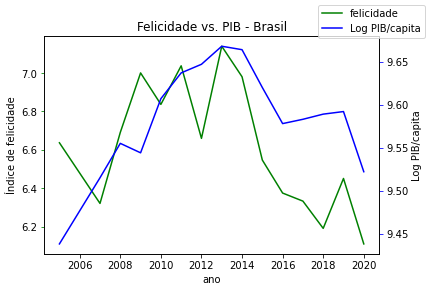

In [66]:
fig, ax1 = plt.subplots()

color = 'green'
ax1.set_xlabel('ano')
ax1.set_ylabel('Índice de felicidade')
ax1.plot(anos, felicidade, color = color, label = 'Felicidade')
ax1.tick_params(axis = 'y', color = color)

ax2 = ax1.twinx()

color = 'blue'
ax2.set_xlabel('ano')
ax2.set_ylabel('Log PIB/capita')
ax2.plot(anos, pib, color = color, label = 'Log PIB/capita')
ax2.tick_params(axis = 'y', color = color)


fig.legend(loc="upper right")
plt.title('Felicidade vs. PIB - Brasil')
plt.show()


É possível perceber que, aproximadamente em 2013, a felicidade atinge seu pico, assim como o PIB _per capita_ (em dólares). A partir de então, o índice de felicidade têm uma queda brusca, assim como o PIB. Isso parece indicar que, até 2013, o PIB e o índice de felicidade estavam menos relacionados (em 2009, é possível observar um pico do índice de felicidade coincidindo com um vale do PIB _per capita_). 

### Correlação de Pearson

A correlação de Pearson entre dois vetores $u, v \in \mathbb{R}^n$, $v = (v_1, \dots, v_n), u = (u_1, \dots, u_n)$ é dada por
$$\operatorname{Corr}(u, v) = \frac{\sum_{i = 1}^n(v_i - \bar{v})(u_i - \bar{u})}{\sqrt((\sum_{i=0}^n (v_i - \bar{v})^2)(\sum_{i=1}^n (u_i - \bar{u})^2))}$$

Ela mede estima o quanto a variação da variável da qual amostramos $v$ "depende linearmente" da variável da qual amostramos $u$. Assim, é uma medida de como se relacionam as variáveis de onde amostramos $u$ e $v$. Uma correlação positiva indica que o crescimento de uma indica o crescimento da outra, e negativa que o decrescimento de uma indica o crescimento da outra.

Duas variáveis independentes (no sentido estatístico) têm correlação 0, enquanto correlação 0 não indica independência. Ela indica independência apenas se considerarmos uma "dependência linear" (não confundir com a noção de algelin).

In [47]:
df_br[['Life Ladder', 'Log GDP per capita']].corr()

,Life Ladder,Log GDP per capita
Life Ladder,1.000000,0.458006
Log GDP per capita,0.458006,1.000000


Acima vemos que, ao se considerar todo o período de 2005-2020, a correlação entre PIB _per capita_ e o índice de felicidade é fraca, o que de certa forma é compatível com a nossa análise inicial.

### Índice de percepção de corrupção

Esse índice é a média nacional de um número calculado da seguinte forma: primeiro, obseva-se, para cada entrevistado, as respostas às perguntas "A corrupção é difundida pelo governo ou não?" e "A corrupção é difundida nas empresas ou não?", em que 1 é sim e 0 é não. Depois, calcula-se a média nacional entre os entrevistados.

In [44]:
corrupcao = df_br['Perceptions of corruption']

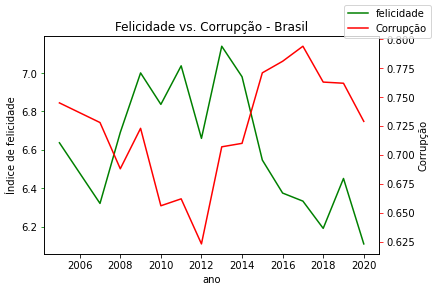

In [64]:
fig, ax1 = plt.subplots()

color = 'green'
ax1.set_xlabel('ano')
ax1.set_ylabel('Índice de felicidade')
ax1.plot(anos, felicidade, color = color, label = 'Felicidade')
ax1.tick_params(axis = 'y', color = color)

ax2 = ax1.twinx()

color = 'red'
ax2.set_xlabel('ano')
ax2.set_ylabel('Corrupção')
ax2.plot(anos, corrupcao, color = color, label = 'Corrupção')
ax2.tick_params(axis = 'y', color = color)


fig.legend(loc="upper right")
plt.title('Felicidade vs. Corrupção - Brasil')
plt.show()


Mais uma vez, é possível observar uma aparente correlação, esperada, entre a percepção de corrupção e o índice de felicidade. A partir de 2013, vemos a primeira crescer enquanto a segunda diminui.

In [49]:
df_br[['Life Ladder', 'Perceptions of corruption']].corr()

,Life Ladder,Perceptions of corruption
Life Ladder,1.000000,-0.556958
Perceptions of corruption,-0.556958,1.000000


Vemos, assim, uma correlação negativa moderada entre a percepção de corrupção e o índice de felicidade.

### Comparação com o resto do mundo

Agora vamos comparar, para cada ano, o índice de felicidade do Brasil com a média mundial, para ver se as tendências que conjecturamos acima são um fenômeno interno, ou parte de um movimento mundial.

Abaixo, calculamos, para cada variável considerada, as médias anuais.

In [71]:
variaveis = ['Life Ladder', 'Log GDP per capita', 'Perceptions of corruption']
medias = dict()
for var in variaveis:
    medias[var] = [df.loc[df['year'] == ano][var].mean() for ano in anos]

Plotamos primeiro o gráfico de felicidade comparativamente com o PIB per capita médios.

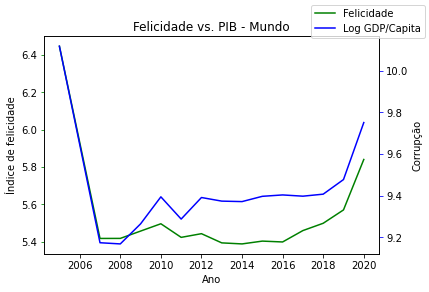

In [72]:
fig, ax1 = plt.subplots()

color = 'green'
ax1.set_xlabel('Ano')
ax1.set_ylabel('Índice de felicidade')
ax1.plot(anos, medias['Life Ladder'], color = color, label = 'Felicidade')
ax1.tick_params(axis = 'y', color = color)

ax2 = ax1.twinx()

color = 'blue'
ax2.set_xlabel('Ano')
ax2.set_ylabel('Corrupção')
ax2.plot(anos, medias['Log GDP per capita'], color = color, label = 'Log GDP/Capita')
ax2.tick_params(axis = 'y', color = color)


fig.legend(loc="upper right")
plt.title('Felicidade vs. PIB - Mundo')
plt.show()

Vemos que, diferentemente do caso do Brasil, o crescimento da variável de felicidade segue junto ao crescimento do PIB per capita, com os dois em tendência de alta em 2020. Acredito que a medida de 2006 seja alguma peculiaridade na pesquisa à época.

In [73]:
np.corrcoef(medias['Life Ladder'], medias['Log GDP per capita'])

array([[1.        , 0.93576662],
       [0.93576662, 1.        ]])

Calculando a correlação de Pearson, vemos que as duas variáveis são bastante correlatas.

Agora façamos o mesmo para a variável de percepção de corrupção:

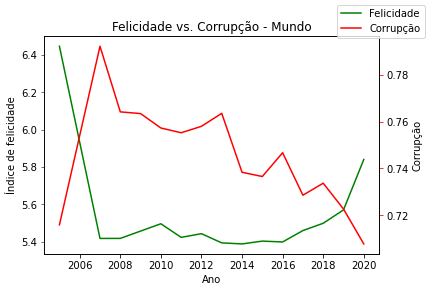

In [76]:
fig, ax1 = plt.subplots()

color = 'green'
ax1.set_xlabel('Ano')
ax1.set_ylabel('Índice de felicidade')
ax1.plot(anos, medias['Life Ladder'], color = color, label = 'Felicidade')
ax1.tick_params(axis = 'y', color = color)

ax2 = ax1.twinx()

color = 'red'
ax2.set_xlabel('Ano')
ax2.set_ylabel('Corrupção')
ax2.plot(anos, medias['Perceptions of corruption'], color = color, label = 'Corrupção')
ax2.tick_params(axis = 'y', color = color)


fig.legend(loc="upper right")
plt.title('Felicidade vs. Corrupção - Mundo')
plt.show()

Conforme esperado, se a percepção de corrupção diminui, a felicidade cresce. Nota-se um aumento da felicidade com a aproximação de 2020, e a diminuição da percepção de corrupção.

In [75]:
np.corrcoef(medias['Life Ladder'], medias['Perceptions of corruption'])

array([[ 1.        , -0.57960514],
       [-0.57960514,  1.        ]])

Vemos acima que a corrupção e a felicidade são moderadamente e negativamente correlatas (no sentido de Pearson).

Por fim, vamos comparar o Brasil com a média mundial:

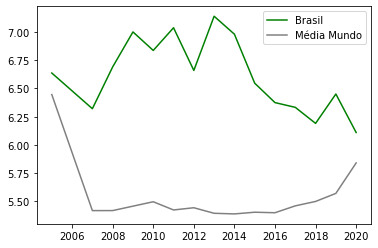

In [78]:
plt.plot(anos, felicidade, color = 'green', label = 'Brasil')
plt.plot(anos, medias['Life Ladder'], color = 'grey', label = 'Média Mundo')
plt.legend()
plt.show()

Assim, vemos que o Brasil teve sempre um índice de felicidade acima da média. No entanto, enquanto a média mundial tem uma tendência de crescimento no período considerado, o Brasil, depois de um pico por volta de 2014, teve sua felicidade com tendência de queda.

## Conclusão

Vemos que 2013 é um ano em que observamos mudanças nas tendências das variáveis consideráveis. Isso é compatível com a noção bastante difundida de que foi neste ano, mais especificamente durante a onda de protestos conhecidas como "Jornadas de Junho", começou a ser gestada a crise social-econômica-política cujos efeitos ainda se desdobram até hoje. Não é possível, no entanto, concluir nada com profundidade, pois este trabalho é uma análise superficial, que não examina a partir do rigor científico os dados obtidos e nem os relaciona a estudos mais aprofundados. É mais como uma curiosidade aliada à uma livre associação de ideias.